# 1.) Import the data from CCLE into a new Google Colab file

In [79]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [80]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B/insurance.csv")

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.
df.loc[df["smoker"] == "yes", "smoker"] = 1.
df.loc[df["smoker"] == "no", "smoker"] = 0.

In [83]:
from sklearn import preprocessing

In [84]:
le = preprocessing.LabelEncoder()

In [85]:
le.fit(df["region"])

LabelEncoder()

In [86]:
list(le.classes_)

['northeast', 'northwest', 'southeast', 'southwest']

In [87]:
df["region"] = le.transform(df["region"])

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,1.0,3,16884.92400
1,18,0.0,33.770,1,0.0,2,1725.55230
2,28,0.0,33.000,3,0.0,2,4449.46200
3,33,0.0,22.705,0,0.0,1,21984.47061
4,32,0.0,28.880,0,0.0,1,3866.85520


# 2.) Split the data into 80/20, in/out sample

In [89]:
import numpy as np

In [90]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [91]:
data

array([[19, 1.0, 27.9, 0, 1.0, 3],
       [18, 0.0, 33.77, 1, 0.0, 2],
       [28, 0.0, 33.0, 3, 0.0, 2],
       ...,
       [18, 1.0, 36.85, 0, 0.0, 2],
       [21, 1.0, 25.8, 0, 0.0, 3],
       [61, 1.0, 29.07, 0, 1.0, 1]], dtype=object)

In [92]:
cut = int((len(data) * .8) // 1)

In [93]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [94]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [95]:
from sklearn.linear_model import LassoCV
modCV = LassoCV().fit(in_data_scale, in_target)

In [96]:
a = modCV.alpha_

In [97]:
a

133.34880015958146

# 5.) Run a lasso regression with that Lambda

In [98]:
from sklearn import linear_model

In [99]:
mod1 = linear_model.Lasso(alpha = a).fit(in_data_scale, in_target)

In [100]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

In [101]:
import matplotlib.pyplot as plt

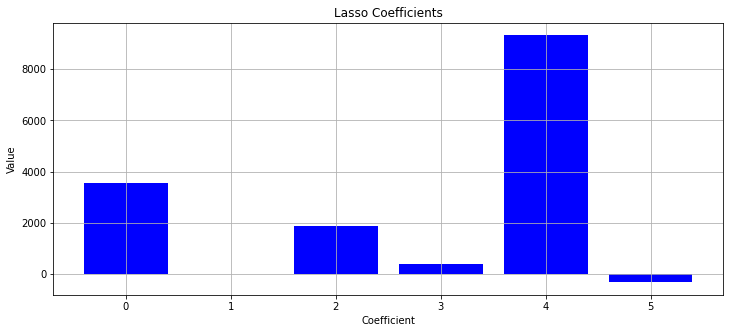

In [102]:
plt.figure(figsize=(12,5))
plt.bar(np.arange(0,6), mod1.coef_, width=0.8, bottom=0, color="b")
plt.title("Lasso Coefficients")
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.grid()
plt.show()

# 7.) Interpret the coefficients

In [103]:
# Since we have normalized the data, we can see that the binary variable `smoker` 
# is the most important feature because it has the largest magnitute. And all other three
# have the positive relationship with the insurance charge except that `sex` doesn't matter in our regression
# and `region` has the negative relationship with the insurance charge.

# 8.) Compare in and out of sample MSE’s

In [104]:
from sklearn.metrics import mean_squared_error

In [105]:
# In sample data
in_predict = mod1.predict(np.array(in_data_scale))
print("MSE of in sample data: " , mean_squared_error(in_target, in_predict))



# Out of sample data
out_predict = mod1.predict(np.array(out_data_scale))
print("MSE of out of sample data: " , mean_squared_error(out_target, out_predict))

MSE of in sample data:  36490415.101693384
MSE of out of sample data:  37252730.724018715
